<a href="https://colab.research.google.com/github/Grover1204/Facial-Emotion-Recognition/blob/main/Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Facial** **Emotion** **Recognition**



# ***Introduction***
In this project i am working facial emotion recognition and the primary objective is to develop a machine learning model to identify the facial expressions. We are using deep learning techniques to classify the each facial expression into categories such as 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'. This model will helpful in various domains like health care , entertainment and security.

In [ ]:
# loading packages
import numpy as np
from PIL import Image
import urllib.request
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import pandas as pd

Upload the kaggle api json file to get the access of dataset. The kaggle file is available in kaggle website and go to setting , there you can find the create new token. download the file and upload the file in colab.

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"985a0c3ef5235ec2320d6248276991c0"}'}

In [ ]:
#I installed kaggle package to download the emotion dataset from kaggle.
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# all the dataset available in kaggle
!kaggle datasets list

ref                                                         title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
hummaamqaasim/jobs-in-data                                  Jobs and Salaries in Data Science            76KB  2023-12-25 20:03:32           6763        125  1.0              
thedrcat/daigt-v2-train-dataset                             DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           4393        336  1.0              
bhavikjikadara/grocery-store-dataset                        Grocery Store Dataset                       391KB  2024-01-06 04:35:55           1302         29  1.0              
nelgiriyewithana/new-york-housing-market                    New York Housing Market                     271KB  2024-01-0

In [ ]:
# api command to download the emotion dataset
! kaggle datasets download -d msambare/fer2013

 93% 56.0M/60.3M [00:00<00:00, 175MB/s]
100% 60.3M/60.3M [00:00<00:00, 182MB/s]


In [ ]:
# the above command will help to download the dataset in zip file
# now unziping the zip file
! unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
# this load_data function helps to load all the images and labels from the directory
def load_data(folder):
    images = []
    labels = []
    for subdir in os.listdir(folder):
        for filename in os.listdir(os.path.join(folder, subdir)):
            img_path = os.path.join(folder, subdir, filename)
            try:
                img = Image.open(img_path).convert('L')
                img = np.array(img)
                images.append(img)
                labels.append(subdir)
            except:
                print("Unable to load image", img_path)
    return np.array(images), np.array(labels)


In [ ]:
# path
train_dir = '/content/train'
test_dir = '/content/test'

In [ ]:
train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

In [ ]:
class_labels = os.listdir(train_dir)  # list the subdirectories in the train directory
class_labels.sort()  # sort the class labels in alphabetical order


In [ ]:
class_labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [ ]:
len(train_images)

28709

In [ ]:
len(train_labels)

28709

In [ ]:
len(test_images)

7178

In [ ]:
len(test_labels)

7178

In [ ]:
train_images[1]

array([[  9,  24,  43, ...,  80,  77,  84],
       [ 12,  19,  38, ...,  84,  81,  80],
       [ 11,  15,  25, ...,  81,  84,  83],
       ...,
       [ 66,  68,  69, ...,  92,  91,  95],
       [ 66,  66,  72, ..., 110, 128, 133],
       [ 66,  66,  74, ..., 146, 173, 168]], dtype=uint8)

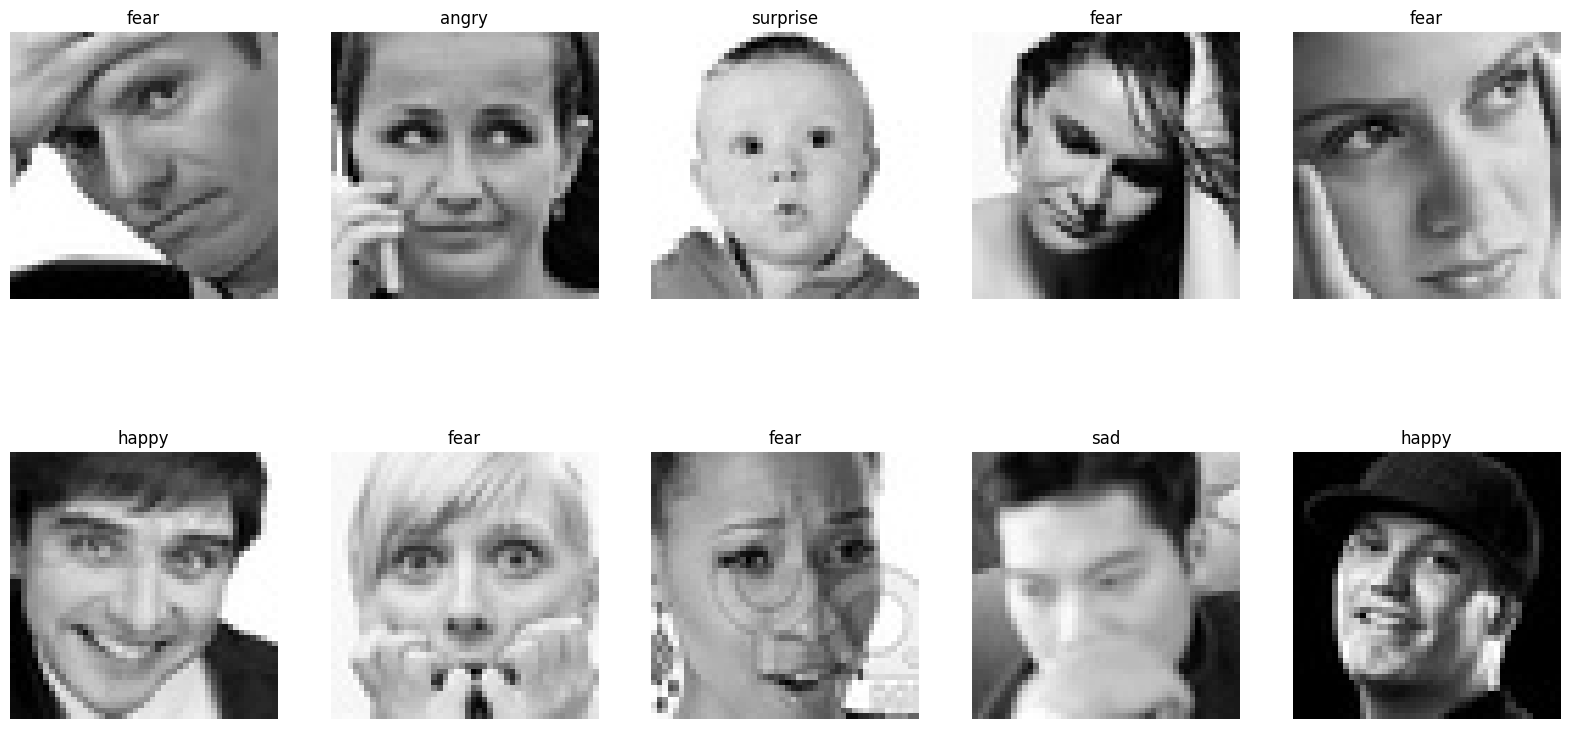

In [ ]:
# Generate 10 random indices from the training data before resizing images
random_indices = np.random.choice(len(train_images), size=10, replace=False)

plt.figure(figsize=(20, 10))

for i, idx in enumerate(random_indices):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx], cmap='gray')  # display images in grayscale
    plt.title(train_labels[idx])  # title is the corresponding class label
    plt.axis("off")

plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#  image dimensions
new_dim = (48, 48)

# Initialize arrays for storing resized images
train_images_resized = np.zeros((train_images.shape[0], new_dim[0], new_dim[1]))
test_images_resized = np.zeros((test_images.shape[0], new_dim[0], new_dim[1]))



In [ ]:
train_images_resized[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Resize train images
for i in range(train_images.shape[0]):
    train_images_resized[i] = resize(train_images[i], new_dim)

# Resize test images
for i in range(test_images.shape[0]):
    test_images_resized[i] = resize(test_images[i], new_dim)

# Assign resized images back to original variables
train_images = train_images_resized
test_images = test_images_resized

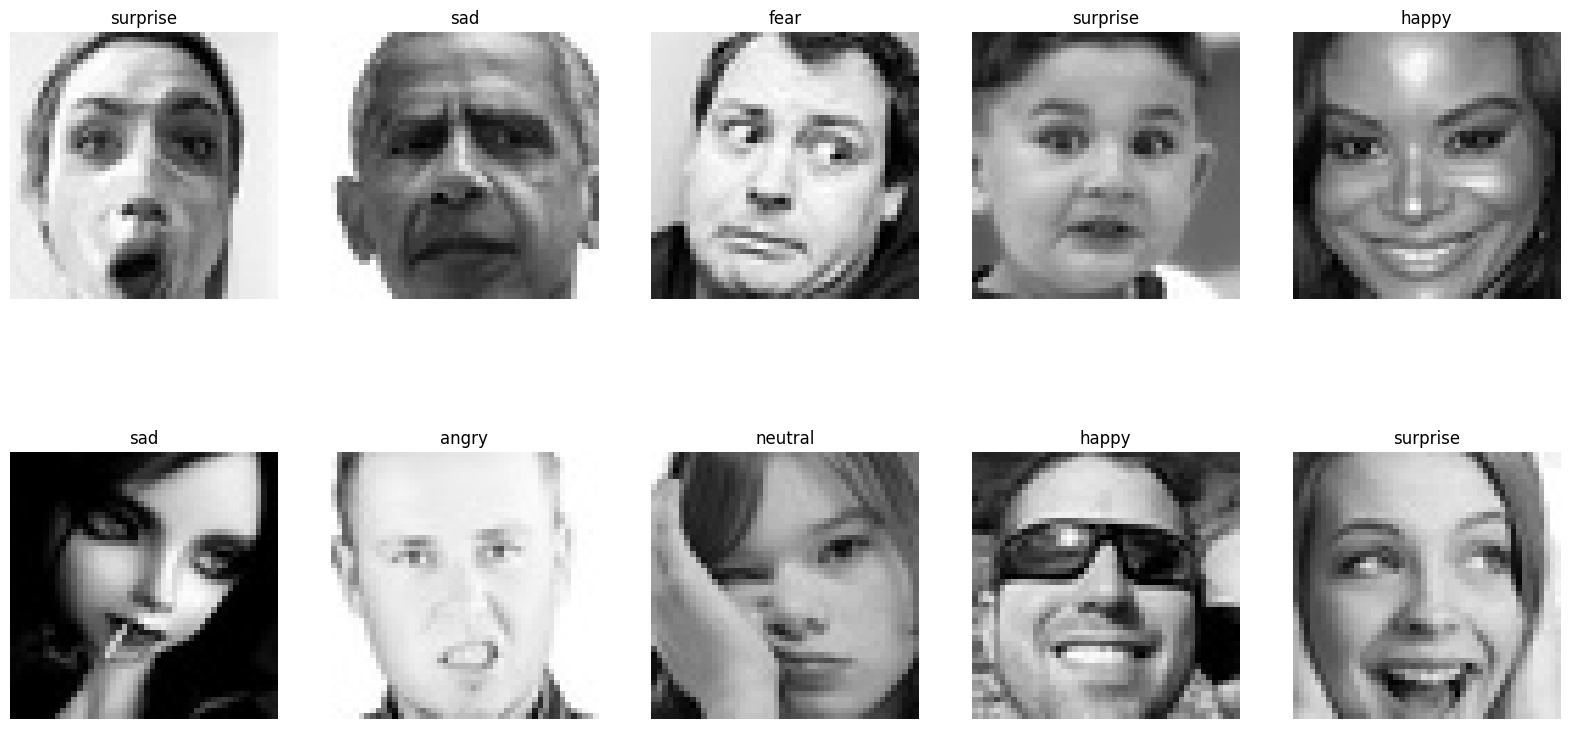

In [ ]:
# Generate 10 random indices from the training data
random_indices = np.random.choice(len(train_images), size=10, replace=False)

plt.figure(figsize=(20, 10))

for i, idx in enumerate(random_indices):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[idx], cmap='gray')  # display images in grayscale
    plt.title(train_labels[idx])  # image labels
    plt.axis("off")

plt.show()

In [ ]:
train_images.shape

(28709, 48, 48)

In [ ]:
train_labels.shape

(28709,)

In [ ]:
test_labels.shape

(7178,)

In [ ]:
test_images.shape

(7178, 48, 48)

In [ ]:
# Instantiate the encoder
encoder = LabelEncoder()

# Fit and transform the training labels
train_labels = encoder.fit_transform(train_labels)

# Transform the test labels
test_labels = encoder.transform(test_labels)


convolutional neural network (CNN) for facial expression recognition built using TensorFlow's Keras API.

the input shape is (48,48,1) - height, width and grayscale

The Conv2D layer contains 64 filters, each with dimensions 3x3. The Conv2D layer serves as one of the fundamental building blocks of Convolutional Neural Networks (CNNs), which are commonly employed in image processing tasks such as classification, object detection, and segmentation. The Conv2D layer carries out convolution operations, which involve taking the dot product between the kernel and sections of the input image. This process is instrumental in extracting features like edges, textures, and corners. Conv2D layers are integral to the performance of CNNs in image processing tasks, as they allow the model to learn and discern complex features from input images. Several hyperparameters are associated with Conv2D, such as kernel_size, activation, and input_shape. The kernel, here of size 3x3, determines the filter size and influences the types of features extracted. The 'relu' activation function (Rectified Linear Unit) is specified via the activation hyperparameter. ReLU returns the input value if it is positive, and zero if it is negative. Input_shape defines the dimensions of the input image for the Conv2D layer.

BatchNormalization is a crucial layer that operates on batches of data rather than the entire dataset. By normalizing the activations of the preceding layers, this layer enhances the stability and efficiency of the neural network.

The MaxPooling2D layer is utilized to diminish the spatial dimensions of the output from the previous layer, while still retaining the most significant features. It aids in identifying patterns within the data.

Dropout is an essential layer for mitigating overfitting. During training, it randomly deactivates a portion of the neurons in the preceding layer. In this specific architecture, 25% of the neurons are randomly dropped in each training epoch.

Flatten is a critical layer used for reshaping the output of the preceding layer from a 2D matrix (or tensor) into a 1D vector. This transformation enables the output from the convolutional layers to be fed into the fully connected layers, thus allowing the network to generate predictions based on the input image.

Lastly, Dense layers are used for fully connected operations within the neural network. For instance, one of the Dense layers in this network has 256 neurons and employs the ReLU activation function. The weights of these neurons are fine-tuned during training to optimize the performance of the model.

In [ ]:
# Number of emotion classes (e.g., happy, sad, angry, ...)
num_classes = len(set(train_labels))  # Assuming your labels are integers from 0 to num_classes-1

# Input shape (48, 48, 1) since the images are 48x48 and grayscale
input_shape = (48, 48, 1)

# Build the Sequential model
model = Sequential([
    # First Convolutional Block
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second Convolutional Block
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(512, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flattening
    Flatten(),

    # Fully Connected Layer
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 128)       5


**First Convolutional Block**:
    - **Conv2D**: The first layer is a 2D convolutional layer with 64 filters, each of size 3x3. This layer applies 64 different filters to the input images, which can help in detecting various features in the image (e.g., edges, textures). It uses the 'ReLU' (Rectified Linear Unit) activation function.
    - **BatchNormalization**: This normalizes the activations of the previous layer at each batch, i.e., makes the distribution of the activations to be mean 0 and standard deviation 1. It helps in improving the training process.
    - **MaxPooling2D**: This layer down-samples the input representation by taking the maximum value over the window defined by `pool_size` (2, 2) for each dimension along the features axis.
    - **Dropout**: This sets 25% of the input units to 0 at each update during training time, which helps prevent overfitting.

**Second Convolutional Block**: Similar to the first, but this one has 128 filters in the Conv2D layer.

**Third Convolutional Block**: Similar structure again, but with 512 filters in the Conv2D layer.

**Fourth Convolutional Block**: Same as the third convolutional block.

**Flatten Layer**: This layer is used to convert the 2D matrices from the pooled feature maps into a 1D vector. This flattening is needed so that you can make use of fully connected layers after some convolutional/maxpool layers.

**Fully Connected Layer**:
    - **Dense**: A fully connected layer where every input neuron is connected to every output neuron. This layer has 256 neurons and uses the ReLU activation function.
    - **BatchNormalization**: Same as before.
    - **Dropout**: Sets 50% of the input units to 0 at each update during training time to combat overfitting.

**Output Layer**:
    - **Dense**: This is the final layer, which has as many neurons as there are classes (different facial expressions). It uses the 'softmax' activation function which is generally used for multi-class classification problems. It outputs a probability distribution over the classes - basically telling you the probability that the input image belongs to each of the classes.

Lastly, the model is compiled with the `adam` optimizer, the `sparse_categorical_crossentropy` loss function (which is used for integer targets), and will track `accuracy` as a metric.

This network architecture is a standard example of a deep CNN which is effective in image classification tasks, including facial expression recognition.

In [ ]:
# Training the model
history = model.fit(train_images.reshape(-1, 48, 48, 1), train_labels,
                    validation_data=(test_images.reshape(-1, 48, 48, 1), test_labels),
                    epochs=15, batch_size=64)


Epoch 1/15
449/449 [==============================] - 1038s 2s/step - loss: 2.0283 - accuracy: 0.3026 - val_loss: 2.1464 - val_accuracy: 0.2079
Epoch 2/15
449/449 [==============================] - 1025s 2s/step - loss: 1.4535 - accuracy: 0.4499 - val_loss: 1.5799 - val_accuracy: 0.4139
Epoch 3/15
449/449 [==============================] - 1086s 2s/step - loss: 1.2910 - accuracy: 0.5098 - val_loss: 1.5289 - val_accuracy: 0.4209
Epoch 4/15
449/449 [==============================] - 1085s 2s/step - loss: 1.2166 - accuracy: 0.5404 - val_loss: 1.3991 - val_accuracy: 0.4765
Epoch 5/15
449/449 [==============================] - 1051s 2s/step - loss: 1.1542 - accuracy: 0.5582 - val_loss: 1.1576 - val_accuracy: 0.5634
Epoch 6/15
 50/449 [==>...........................] - ETA: 14:56 - loss: 1.0690 - accuracy: 0.5934

Results

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create the x values (the epoch numbers)
epochs = range(1, len(training_accuracy) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'rD-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Replace this path with the path of your image
image_path = '/content/pexels-moose-photos-1036620.jpg'

image = Image.open(image_path)
image = image.convert('L')  # Convert image to grayscale
image = image.resize((48, 48))
image = np.array(image)
image = image / 255.0  # Scale pixel values to [0, 1]
image = image[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions

predictions = model.predict(image)

emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_classes[np.argmax(predictions)]

# Print the result
print(f"Predicted emotion: {predicted_emotion}")


1/1 [==============================] - 0s 229ms/step
Predicted emotion: Surprise


In [ ]:
# Save the entire model to a file
model.save('model_output.h5')


NameError: ignored

In [ ]:
from tensorflow.keras.models import load_model

# Reload the model from the file
loaded_model = load_model('path_to_my_model.h5')

# The model can now be used for predictions or further training


In [ ]:
loaded_model

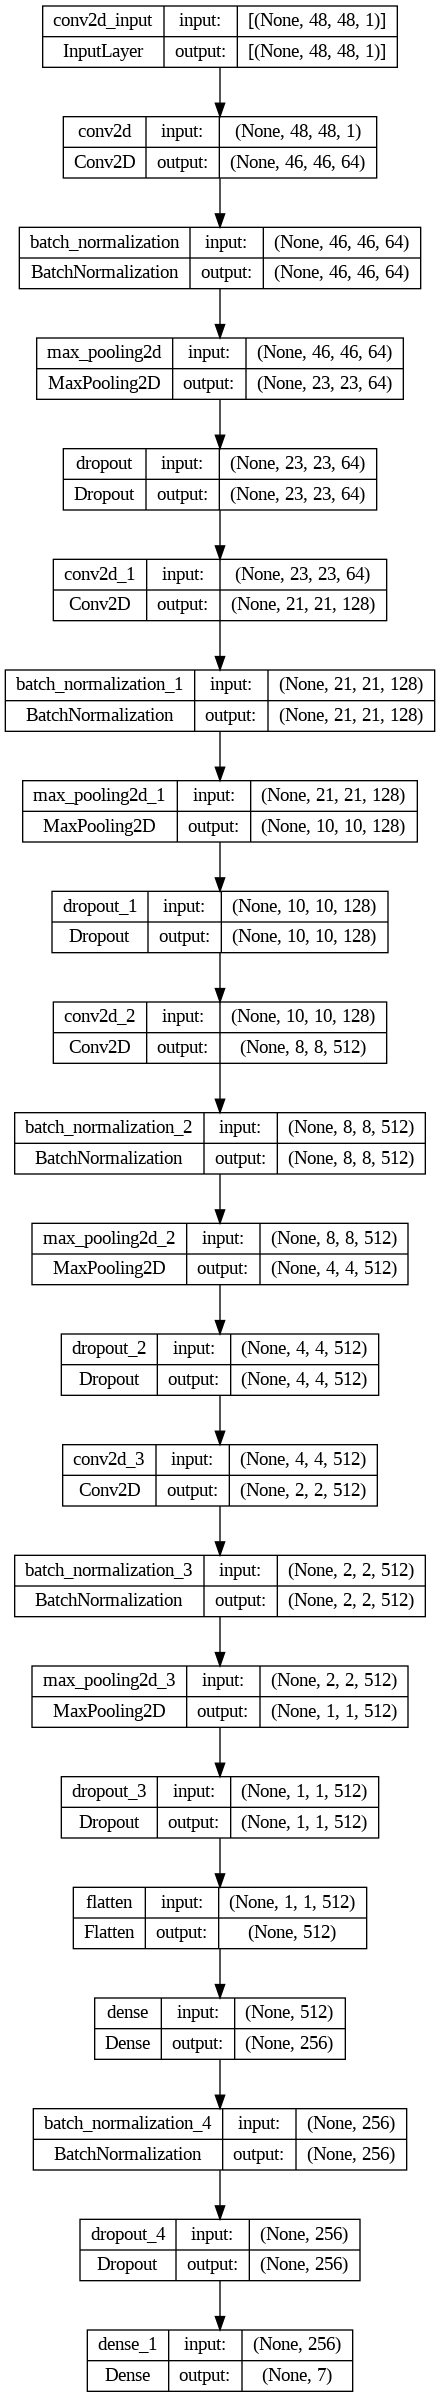

In [ ]:
# Plot the model summary
plot_model(model, to_file='model_summary.png', show_shapes=True)
